### Information about the different models which might be useful when writing the paper
C-RADIOv2 models are available in multiple sizes: Base (90M parameters). Huge (653M parameters). C-RADIOv2 was trained for 1M steps (400k more steps than v1), using inverse frequency sampling for data balancing, and PHI Standardization for teacher distribution balancing. 

Model Architecture
Architecture Type: Neural Network
Network Architecture: Vision Transformer

c-radio-h	ViT-H/16-CPE https://github.com/NVlabs/RADIO

In [787]:
# setup

import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np

MODELS = {
    "clip-vit-base-patch16": "CLIP ViT-B/16",
    "dino_vitb16": "DINO ViT-B/16",
    "dinov2_vitb14": "DINOv2 ViT-B/14",
    "C-RADIOv2-B": "C-RADIOv2 ViT-B/16-CPE",
    "siglip-base-patch16-224": "SigLIP B/16-224", 
    # "tips-b14" : "TIPS ViT-B/14-HR(448)",
}
COLORS = {
    "clip-vit-base-patch16": "#1f77b4",
    "dino_vitb16": "#ff7f0e",
    "dinov2_vitb14": "#2ca02c",
    "C-RADIOv2-B": "#d62728",
    "siglip-base-patch16-224": "#9467bd",
    # "tips-b14": "#8c564b",
}
TRAIN_BINS_DIFFICULTY = {
    "0_30_60_90": "easy",
    "0_45_90": "medium",
    "0_90": "hard",
    "0": "extreme"
}
XTICKS = [0, 15, 30, 45, 60, 75, 90]
CLASS_TO_INDEX = {
    0: 0,
    7: 1,
    8: 2,
    19: 3,
    46: 4,
    57: 5,
    60: 6,
    70: 7,
    99: 8,
    100: 9,
    113: 10,
    125: 11,
    126: 12,
    152: 13,
    166: 14,
    196: 15,
}
CLASS_TO_NAME = {
    0: "background",
    7: "stove",
    8: "sofa",
    19: "microwave",
    46: "bed",
    57: "toy cat",
    60: "toy cow",
    70: "toy dragon",
    99: "coat rack",
    100: "guitar stand",
    113: "ceiling lamp",
    125: "toilet",
    126: "sink",
    152: "strings",
    166: "broccoli",
    196: "durian"
}


# Experiment A

In [788]:
PATH = "results_exp_a.csv"
DF = pd.read_csv(PATH)

DF

,job_id,model,train_bins,val_bin,jac_mean,jac_std,jac0,jac1,jac2,jac3,...,jac10,jac11,jac12,jac13,jac14,jac15,d_model,batch_size,input_size,patch_size
0,12021091,dino_vitb16,0_30_60_90,0,0.826893,0.125564,0.975572,0.905922,0.923708,0.881949,...,0.856432,0.916795,0.839872,0.896940,0.890853,0.916767,768,32,224,16
1,12021091,dino_vitb16,0_30_60_90,15,0.764651,0.163133,0.970989,0.876963,0.884925,0.812716,...,0.788013,0.913787,0.631724,0.891518,0.873756,0.903748,768,32,224,16
2,12021091,dino_vitb16,0_30_60_90,30,0.825657,0.130331,0.977245,0.911836,0.919611,0.895490,...,0.856773,0.923169,0.837383,0.905153,0.883450,0.919130,768,32,224,16
3,12021091,dino_vitb16,0_30_60_90,45,0.772162,0.158572,0.972523,0.886317,0.869771,0.845950,...,0.787810,0.904616,0.705566,0.897099,0.871858,0.914517,768,32,224,16
4,12021091,dino_vitb16,0_30_60_90,60,0.830947,0.115373,0.978162,0.913237,0.914922,0.890654,...,0.842771,0.911340,0.852260,0.907761,0.881210,0.917564,768,32,224,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,12021090,clip-vit-base-patch16,0,30,0.672436,0.194766,0.960635,0.814532,0.807848,0.672623,...,0.666019,0.863245,0.505557,0.835260,0.805063,0.863597,768,32,224,16
136,12021090,clip-vit-base-patch16,0,45,0.652876,0.202210,0.959144,0.802899,0.766942,0.659729,...,0.648623,0.846239,0.468260,0.814245,0.813349,0.866073,768,32,224,16
137,12021090,clip-vit-base-patch16,0,60,0.639765,0.205935,0.959028,0.789323,0.759650,0.634662,...,0.637842,0.834791,0.462928,0.782203,0.819136,0.861903,768,32,224,16
138,12021090,clip-vit-base-patch16,0,75,0.641506,0.201745,0.959376,0.789241,0.779277,0.624920,...,0.657917,0.819707,0.494278,0.774941,0.817399,0.855943,768,32,224,16


In [789]:
def plot_exp_a(classes: None | list[int], include_bg: bool, extratitle: str):
    """
    Plot experiment A result for specified class.
    Class is either None (all classes) or a list of class numbers
    """
    
    assert type(classes) in [list, type(None)], "classes must be a list or None"

    if classes is None:
        classes = list(CLASS_TO_INDEX.keys())
    else:
        assert all(c in CLASS_TO_INDEX for c in classes), "classes must be a subset of CLASS_TO_INDEX keys"

    if not include_bg:
        # remove background class (0) from classes
        classes = [c for c in classes if c != 0]
    
    class_indices = [CLASS_TO_INDEX[c] for c in classes]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=200)
    axes = axes.flatten()

    for i, (train_bins, difficulty) in enumerate(TRAIN_BINS_DIFFICULTY.items()):
        ax = axes[i]
        
        train_bins_set = set(map(int, train_bins.split("_")))
                
        for model in MODELS.keys():
            df = DF[DF["model"] == model]
            df = df[df["train_bins"] == train_bins].sort_values("val_bin")

            # only get the jacX values for classes X
            df["jac_mean"] = df[[f"jac{c}" for c in class_indices]].mean(axis=1)
            df["jac_std"] = df[[f"jac{c}" for c in class_indices]].std(axis=1)

            x_values = df["val_bin"]
            y_values = df["jac_mean"].values
            y_error = df["jac_std"].values

            if len(x_values) == 0 or len(y_values) == 0:
                print(f"No data for model {model} with train_bins {train_bins} and classes {classes}")
                continue

            # plot the data
            for j, (x_value, y_value) in enumerate(zip(x_values, y_values)):
                # Use asterisk marker if bin is trained on, circle for others
                marker = 'x' if int(x_value) in train_bins_set else 'o'
                ax.scatter(x_value, y_value, label=f"{MODELS[model]}" if j == 1 else "", 
                           color=COLORS[model], marker=marker, s=50, zorder=2)

            # include error bars
            ax.errorbar(x_values, y_values, yerr=y_error, fmt='none', color=COLORS[model], 
                        capsize=5, elinewidth=0)
            
        ax.set_xticks(XTICKS)
        ax.set_ylim(0, 1)
        ax.set_title(f"({string.ascii_letters[i]}) Training bin(s) = {', '.join(train_bins.split('_'))} ({difficulty})")
        # ax.set_title(f"Extreme difficulty, class: ceiling lamp", fontsize=10)
        ax.set_xlabel("Bin")
        ax.set_ylabel("mIoU")
        ax.grid(True)

    axes[0].legend()
    plt.suptitle(f"Experiment A results ({extratitle})", fontsize=14)
    plt.tight_layout()
    plt.show()


## Plots

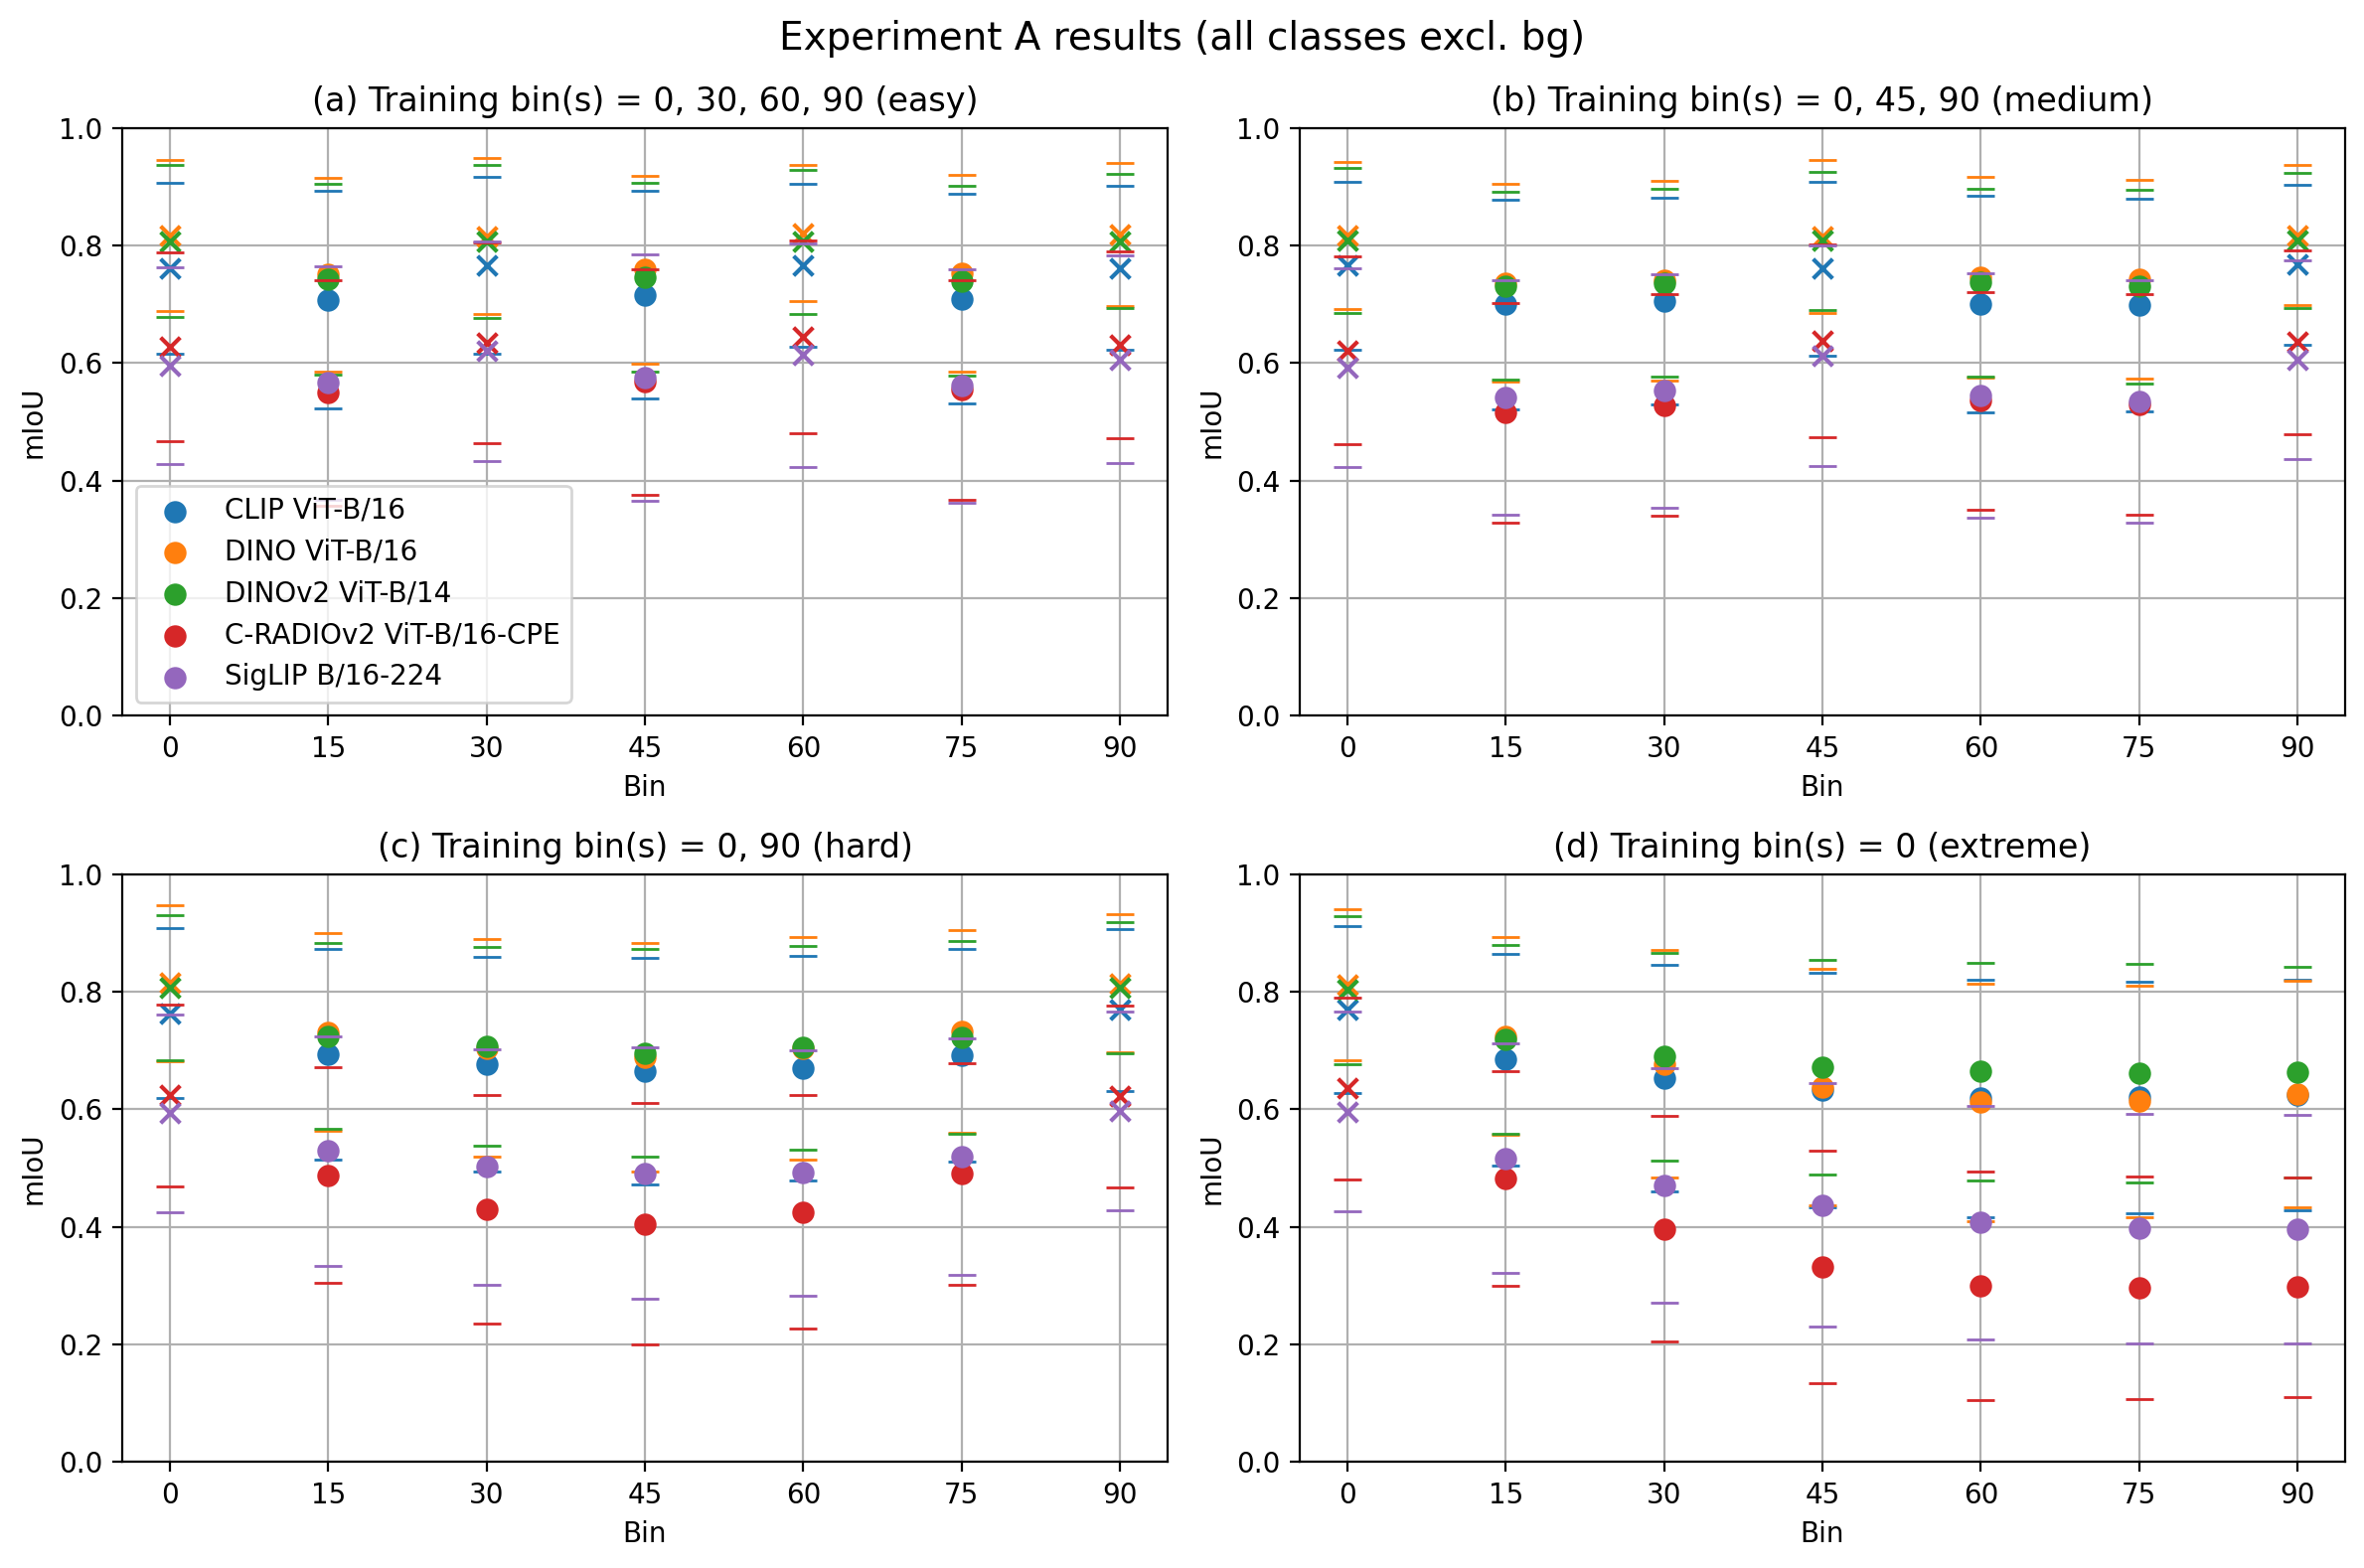

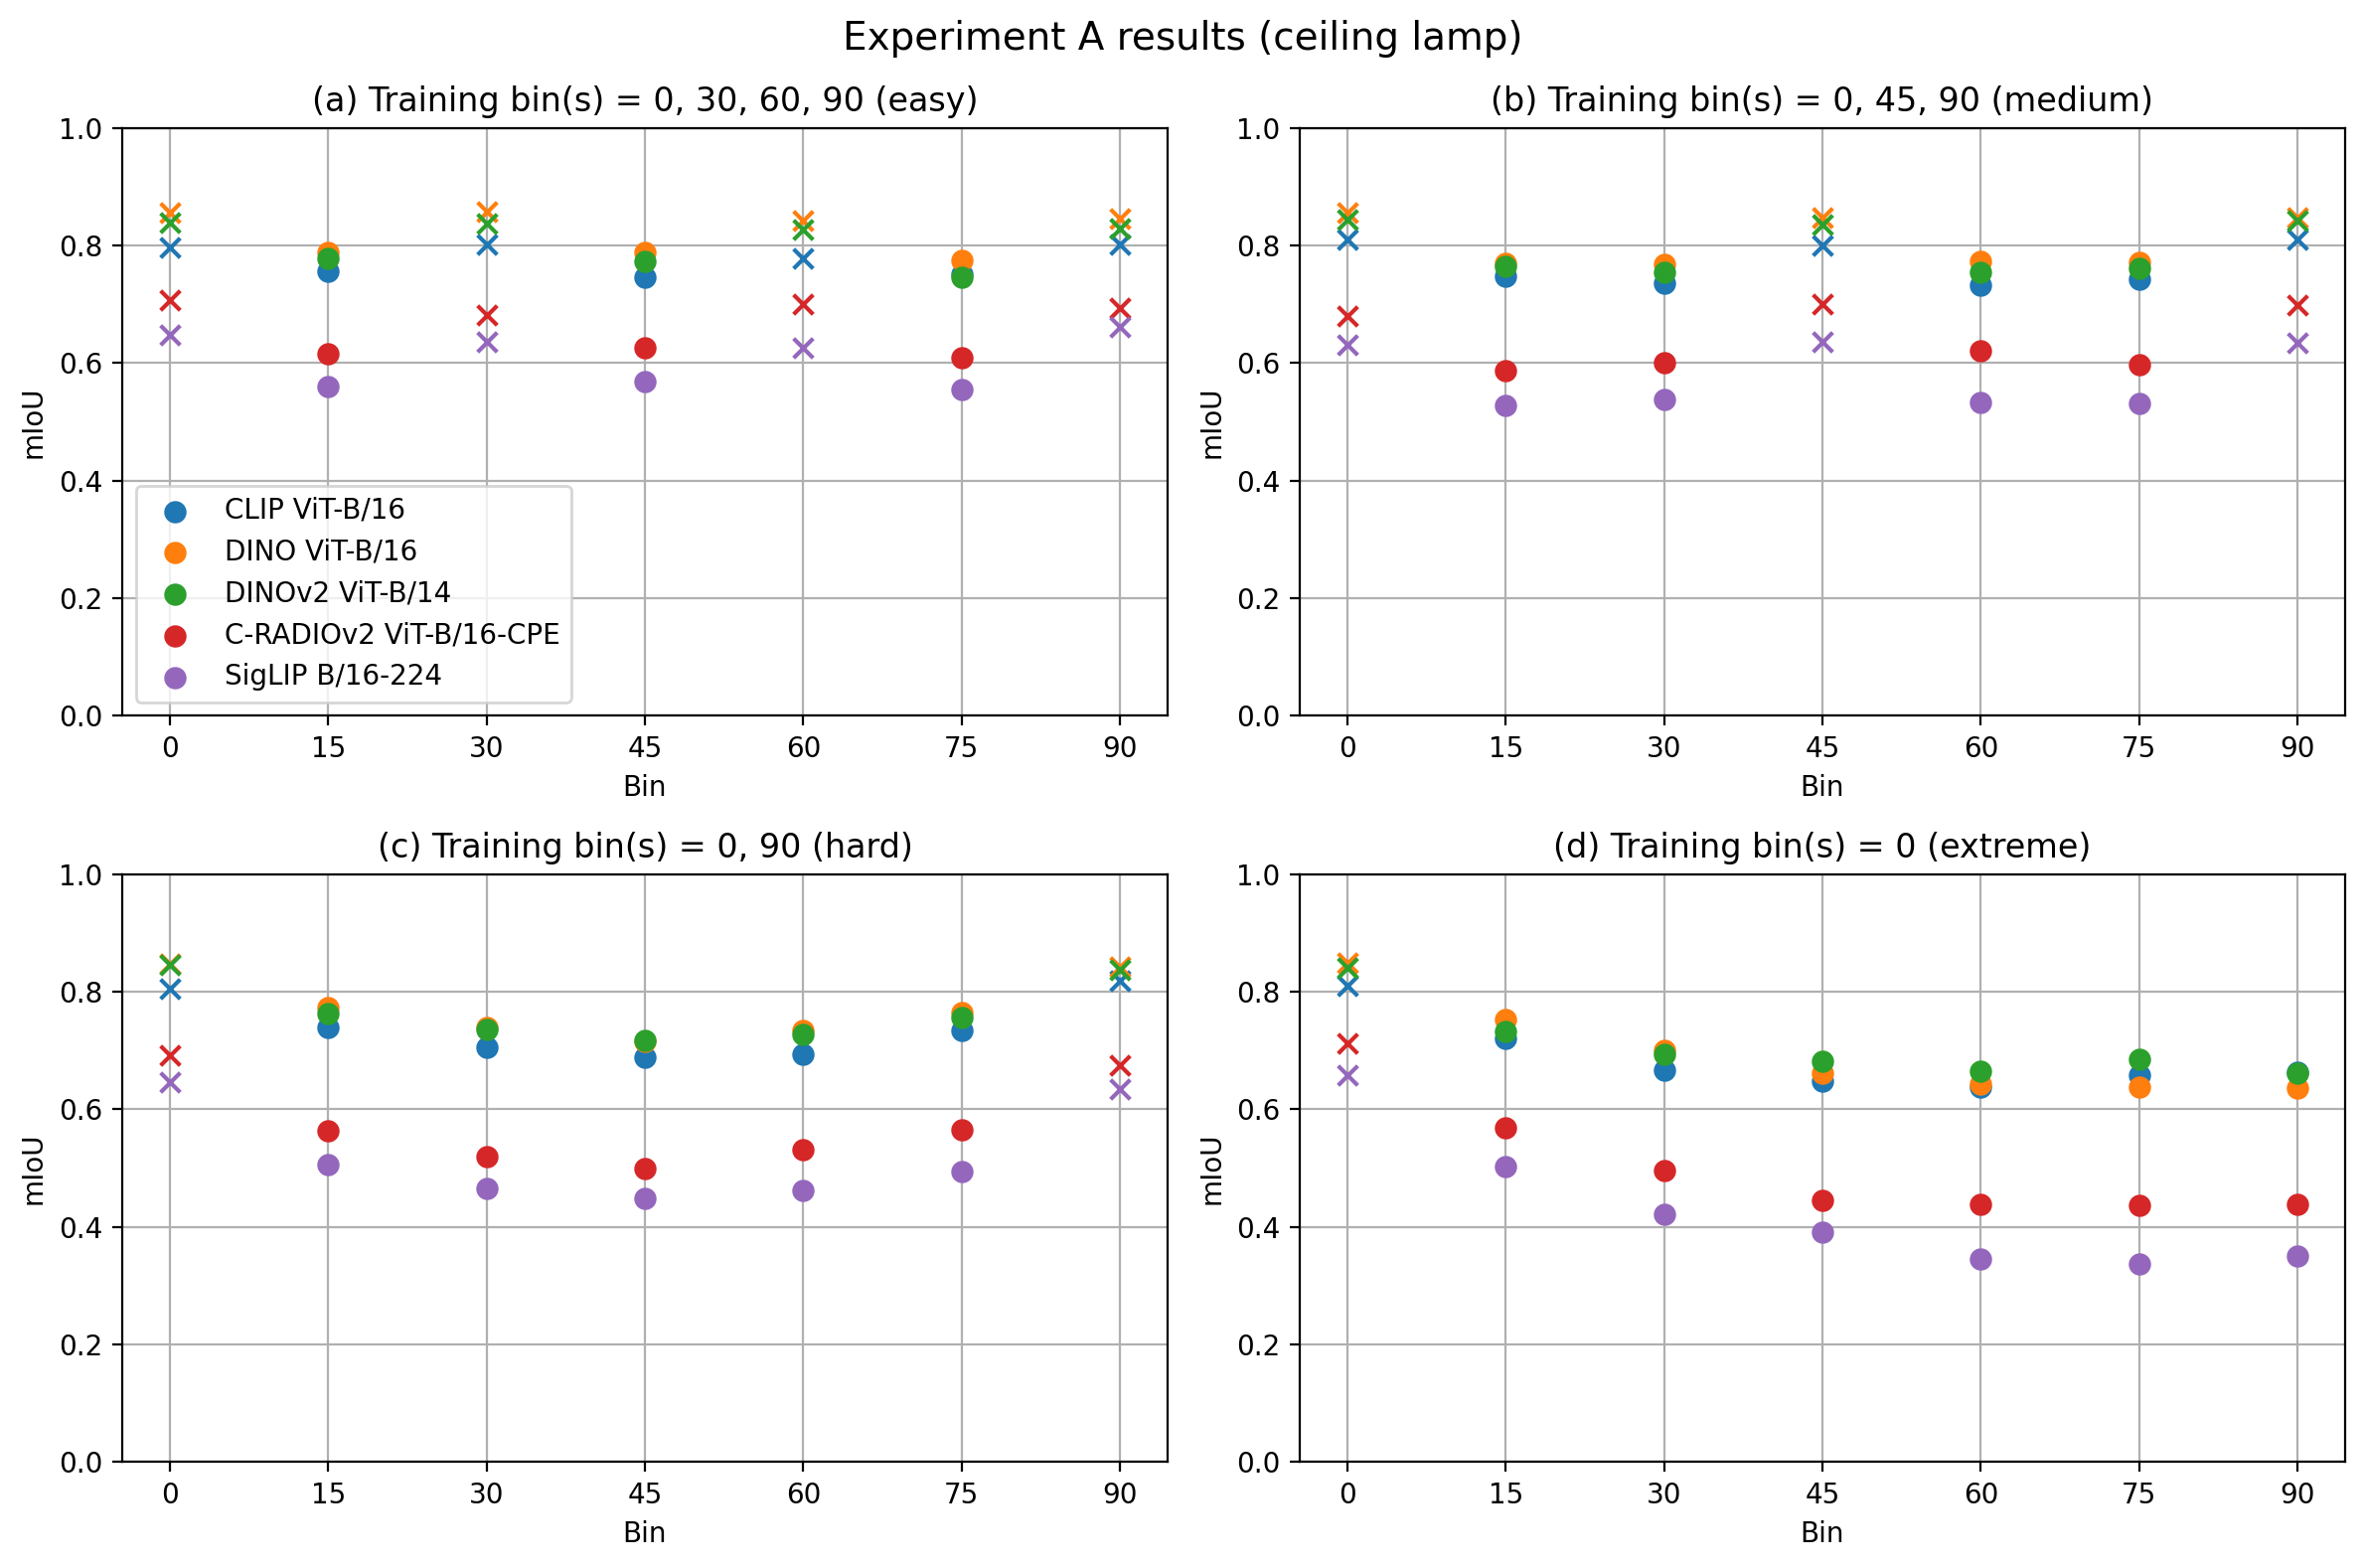

In [790]:
# plot figure with all classes included
plot_exp_a(None, False, extratitle="all classes excl. bg")
# plot_exp_a(None, True, extratitle="all classes incl. bg")

# plot specific classes
plot_exp_a([113], False, extratitle=CLASS_TO_NAME[113])  # ceiling lamp

## Table

In [791]:
df = pd.read_csv(PATH)

# change train_bins to a list of integers
df["train_bins"] = df["train_bins"].apply(lambda x: list(map(int, x.split("_"))))

# if val_bin is in train_bins, set val_in_trained accordingly
df["val_in_trained"] = df.apply(lambda row: row["val_bin"] in row["train_bins"], axis=1)

# set difficulty column
df["difficulty"] = df["train_bins"].apply(lambda x: TRAIN_BINS_DIFFICULTY["_".join(map(str, x))])

# filter only untrained bins
df = df[~df["val_in_trained"]].copy()

df_exp_a = pd.DataFrame(columns=["model", "easy", "medium", "hard", "extreme"])

# for each model and difficulty, calculate the mean and std of jac_mean
for model in MODELS.keys():
    model_df = df[df["model"] == model]
    model_df.loc[:, "jac_mean"] = model_df[[f"jac{i}" for i in range(1, 16)]].mean(axis=1)
    model_df.loc[:, "jac_std"] = model_df[[f"jac{i}" for i in range(1, 16)]].std(axis=1)
    
    # calculate mean and std for each difficulty
    means = model_df.groupby("difficulty")["jac_mean"].mean()
    stds = model_df.groupby("difficulty")["jac_std"].mean()

    # create a row for the model
    row = {
        "model": MODELS[model],
        "easy": f"{means.get('easy', 0):.3f} ± {stds.get('easy', 0):.3f}",
        "medium": f"{means.get('medium', 0):.3f} ± {stds.get('medium', 0):.3f}",
        "hard": f"{means.get('hard', 0):.3f} ± {stds.get('hard', 0):.3f}",
        "extreme": f"{means.get('extreme', 0):.3f} ± {stds.get('extreme', 0):.3f}"
    }
    
    df_exp_a = pd.concat([df_exp_a, pd.DataFrame([row])], ignore_index=True)

df_exp_a

,model,easy,medium,hard,extreme
0,CLIP ViT-B/16,0.711 ± 0.180,0.701 ± 0.180,0.679 ± 0.185,0.639 ± 0.194
1,DINO ViT-B/16,0.754 ± 0.164,0.741 ± 0.170,0.712 ± 0.182,0.648 ± 0.192
2,DINOv2 ViT-B/14,0.743 ± 0.162,0.734 ± 0.161,0.711 ± 0.168,0.678 ± 0.178
3,C-RADIOv2 ViT-B/16-CPE,0.557 ± 0.190,0.528 ± 0.187,0.448 ± 0.194,0.351 ± 0.190
4,SigLIP B/16-224,0.568 ± 0.202,0.543 ± 0.203,0.507 ± 0.204,0.438 ± 0.198


In [792]:
# required for to_latex
# !pip install jinja2

In [793]:
# give latex table
latex_table = df_exp_a.to_latex(index=False, escape=False, column_format='lcccc', 
                                  header=["Model", "Easy", "Medium", "Hard", "Extreme"])
print(latex_table)

\begin{tabular}{lcccc}
\toprule
Model & Easy & Medium & Hard & Extreme \\
\midrule
CLIP ViT-B/16 & 0.711 ± 0.180 & 0.701 ± 0.180 & 0.679 ± 0.185 & 0.639 ± 0.194 \\
DINO ViT-B/16 & 0.754 ± 0.164 & 0.741 ± 0.170 & 0.712 ± 0.182 & 0.648 ± 0.192 \\
DINOv2 ViT-B/14 & 0.743 ± 0.162 & 0.734 ± 0.161 & 0.711 ± 0.168 & 0.678 ± 0.178 \\
C-RADIOv2 ViT-B/16-CPE & 0.557 ± 0.190 & 0.528 ± 0.187 & 0.448 ± 0.194 & 0.351 ± 0.190 \\
SigLIP B/16-224 & 0.568 ± 0.202 & 0.543 ± 0.203 & 0.507 ± 0.204 & 0.438 ± 0.198 \\
\bottomrule
\end{tabular}



# Experiment B

In [794]:
PATH = "results_exp_a.csv"
DF = pd.read_csv(PATH)
DF = DF[DF["train_bins"] == "0"]

DF.head(10)

,job_id,model,train_bins,val_bin,jac_mean,jac_std,jac0,jac1,jac2,jac3,...,jac10,jac11,jac12,jac13,jac14,jac15,d_model,batch_size,input_size,patch_size
84,12021091,dino_vitb16,0,0,0.822456,0.126561,0.975085,0.898131,0.917999,0.882932,...,0.848353,0.909573,0.849215,0.893521,0.882124,0.916434,768,32,224,16
85,12021091,dino_vitb16,0,15,0.739729,0.168314,0.968690,0.853211,0.848576,0.757739,...,0.752297,0.889791,0.579911,0.875909,0.858073,0.903400,768,32,224,16
86,12021091,dino_vitb16,0,30,0.695517,0.193972,0.966827,0.820177,0.806449,0.680391,...,0.700820,0.858462,0.479758,0.849024,0.850739,0.898872,768,32,224,16
87,12021091,dino_vitb16,0,45,0.658430,0.203978,0.965320,0.792162,0.744463,0.606671,...,0.661332,0.790581,0.423562,0.806026,0.851135,0.906013,768,32,224,16
88,12021091,dino_vitb16,0,60,0.633791,0.207805,0.965107,0.762904,0.716897,0.547202,...,0.642127,0.768639,0.401455,0.754888,0.845460,0.902217,768,32,224,16
89,12021091,dino_vitb16,0,75,0.635382,0.202838,0.965580,0.760970,0.735682,0.570539,...,0.638306,0.765689,0.413060,0.765888,0.851079,0.898846,768,32,224,16
90,12021091,dino_vitb16,0,90,0.647165,0.197656,0.965999,0.769184,0.736019,0.613234,...,0.636380,0.783393,0.449104,0.814557,0.841691,0.898111,768,32,224,16
91,12021095,C-RADIOv2-B,0,0,0.655646,0.164267,0.957094,0.728979,0.680082,0.709239,...,0.711653,0.852378,0.532049,0.718891,0.697406,0.867262,768,32,224,16
92,12021095,C-RADIOv2-B,0,15,0.510825,0.204443,0.944235,0.516423,0.531793,0.447789,...,0.567980,0.772835,0.284459,0.623333,0.593824,0.832499,768,32,224,16
93,12021095,C-RADIOv2-B,0,30,0.430676,0.221785,0.938378,0.408744,0.439029,0.291139,...,0.495439,0.682177,0.173928,0.535269,0.535022,0.808757,768,32,224,16


In [795]:
def plot_exp_b(normalize=False):
    fig, ax = plt.subplots(figsize=(6, 4), dpi=200)

    if normalize:
        plt.scatter(0, 1, color="black", marker="x", zorder=5, label="Baseline performance")
        plot_title = "Experiment B results (normalized to 0-bin performance)"
        y_label = "Normalized mIoU"
    else:
        plot_title = "Experiment B results"
        y_label = "mIoU"

    for model in MODELS.keys():
        df = DF[DF["model"] == model].copy()
        df["jac_mean"] = df[[f"jac{i}" for i in range(1, 16)]].mean(axis=1)
        df["jac_std"] = df[[f"jac{i}" for i in range(1, 16)]].std(axis=1)

        if not normalize:
            # plot the 0-bin performance
            df0 = df[df["val_bin"] == 0]
            x_values = df0["val_bin"]
            y_values = df0["jac_mean"]
            plt.scatter(x_values, y_values, color=COLORS[model], marker="x", s=100, zorder=5)

        # plot the other validation bins [15, ..., 90]
        if normalize:
            # get bin=0 performance
            df0 = df[df["val_bin"] == 0]
            model_0_score = df0["jac_mean"].values[0]

            df1590 = df[df["val_bin"] != 0].copy()
            df1590["jac_norm"] = df1590["jac_mean"] / model_0_score
            x_values = df1590["val_bin"]
            y_values = df1590["jac_norm"]
        else:
            df1590 = df[df["val_bin"] != 0]
            x_values = df1590["val_bin"]
            y_values = df1590["jac_mean"].values

        plt.plot(x_values, y_values, label=MODELS[model], color=COLORS[model])

    plt.xlabel("Bin")
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.xticks(XTICKS)
    plt.legend(fontsize='small')
    plt.grid(True)
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()


## Plots

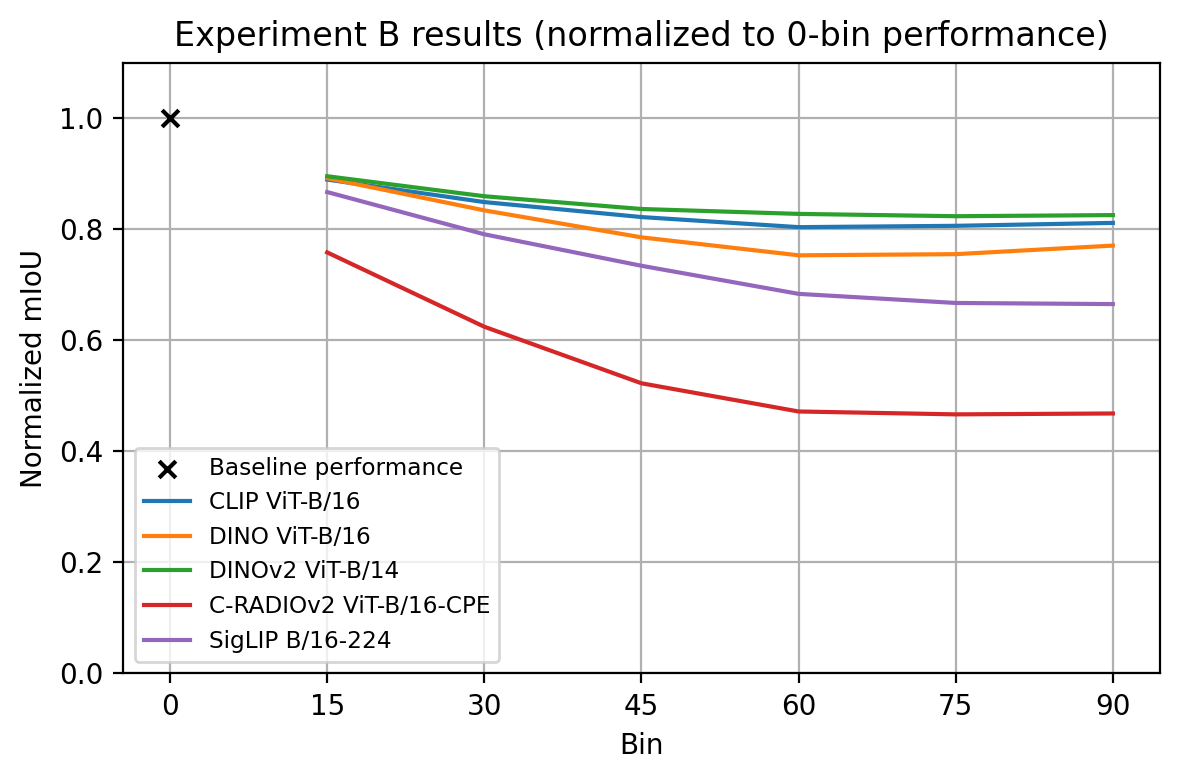

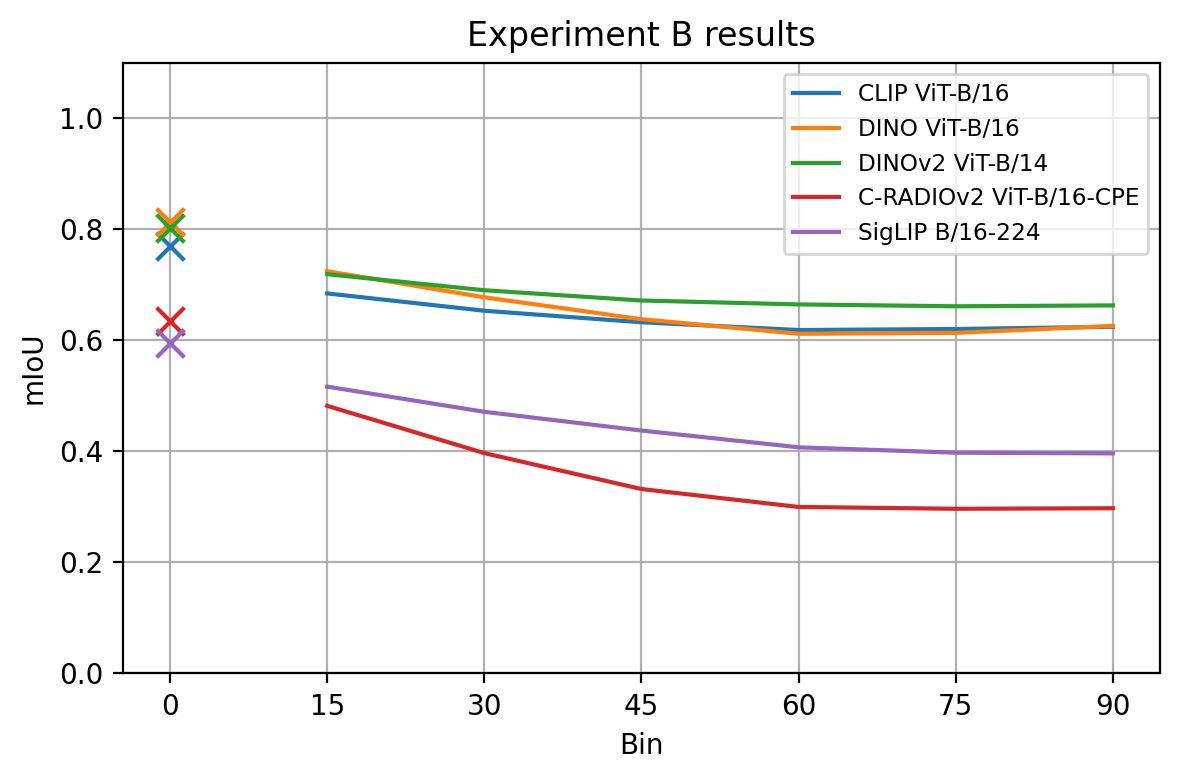

In [796]:
plot_exp_b(normalize=True)
plot_exp_b(normalize=False)

## Table

In [797]:
DF = pd.read_csv(PATH)
DF.loc[:, "jac_mean"] = DF[[f"jac{i}" for i in range(1, 16)]].mean(axis=1)
DF.loc[:, "jac_std"] = DF[[f"jac{i}" for i in range(1, 16)]].std(axis=1)
DF = DF[DF["train_bins"] == "0"]  # extreme difficulty

# df_exp_b = pd.DataFrame(columns=["model", "breaking_point"])

test_df = None

threshold = 0.05

for model in MODELS.keys():
    df = DF[DF["model"] == model].copy()

    # get bin=0 performance
    df0 = df[df["val_bin"] == 0]
    model_0_score = df0["jac_mean"].values[0]

    # df = df[df["val_bin"] != 0].copy()
    df["jac_norm"] = df["jac_mean"] / model_0_score

    # jac_mean_prev is jac_mean but shifted down by one row
    df["jac_norm_prev"] = df["jac_norm"].shift(1)
    # delta is difference between jac norm and shifted jac norm
    df["delta"] = df["jac_norm"] - df["jac_norm_prev"]
    df = df[df["val_bin"] != 0]

    # concat
    if test_df is None:
        test_df = df.copy()
    else:
        test_df = pd.concat([test_df, df], ignore_index=True)

    # row = {
    #     "model": MODELS[model],
    #     "breaking_point": breaking_point
    # }
    # df_exp_b = pd.concat([df_exp_b, pd.DataFrame([row])], ignore_index=True)

test_df

# check the last column called delta for source on these numbers, compare with threshold
# clip: no bp, dino: 30, dinov2: no bp, C-RADIOv2: 30, siglip: 30

,job_id,model,train_bins,val_bin,jac_mean,jac_std,jac0,jac1,jac2,jac3,...,jac13,jac14,jac15,d_model,batch_size,input_size,patch_size,jac_norm,jac_norm_prev,delta
0,12021090,clip-vit-base-patch16,0,15,0.684391,0.179565,0.962383,0.832767,0.816133,0.719314,...,0.856073,0.822126,0.869851,768,32,224,16,0.889431,1.000000,-0.110569
1,12021090,clip-vit-base-patch16,0,30,0.653223,0.192418,0.960635,0.814532,0.807848,0.672623,...,0.835260,0.805063,0.863597,768,32,224,16,0.848925,0.889431,-0.040506
2,12021090,clip-vit-base-patch16,0,45,0.632458,0.198956,0.959144,0.802899,0.766942,0.659729,...,0.814245,0.813349,0.866073,768,32,224,16,0.821939,0.848925,-0.026986
3,12021090,clip-vit-base-patch16,0,60,0.618481,0.201747,0.959028,0.789323,0.759650,0.634662,...,0.782203,0.819136,0.861903,768,32,224,16,0.803774,0.821939,-0.018165
4,12021090,clip-vit-base-patch16,0,75,0.620315,0.197020,0.959376,0.789241,0.779277,0.624920,...,0.774941,0.817399,0.855943,768,32,224,16,0.806158,0.803774,0.002384
5,12021090,clip-vit-base-patch16,0,90,0.624359,0.196339,0.959935,0.785952,0.782371,0.642670,...,0.800334,0.813603,0.857561,768,32,224,16,0.811414,0.806158,0.005257
6,12021091,dino_vitb16,0,15,0.724465,0.168471,0.968690,0.853211,0.848576,0.757739,...,0.875909,0.858073,0.903400,768,32,224,16,0.891889,1.000000,-0.108111
7,12021091,dino_vitb16,0,30,0.677430,0.193370,0.966827,0.820177,0.806449,0.680391,...,0.849024,0.850739,0.898872,768,32,224,16,0.833984,0.891889,-0.057904
8,12021091,dino_vitb16,0,45,0.637970,0.200936,0.965320,0.792162,0.744463,0.606671,...,0.806026,0.851135,0.906013,768,32,224,16,0.785406,0.833984,-0.048579
9,12021091,dino_vitb16,0,60,0.611703,0.202456,0.965107,0.762904,0.716897,0.547202,...,0.754888,0.845460,0.902217,768,32,224,16,0.753068,0.785406,-0.032337


In [799]:
# give latex table
latex_table_exp_b = df_exp_b.to_latex(index=False, escape=False, column_format='lc', 
                                        header=["Model", "Breaking point (bin)"])
print(latex_table_exp_b)

\begin{tabular}{lc}
\toprule
Model & Breaking point (bin) \\
\midrule
\bottomrule
\end{tabular}

